In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



KeyboardInterrupt: 

# LendSmart Credit Risk Analysis

Paulina Leal Mosqueda, A01659576

Santiago Nava Figueroa, A01174557


# Section 1

In [ ]:
# Importar csv

df = pd.read_csv('credit_risk_data-1.csv')
df.head()

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [ ]:
df.describe()

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


In [ ]:
# find nan values
df.isnull().sum()

,0
application_id,0
application_date,0
loan_amount,0
annual_income,0
employment_years,0
job_stability_score,0
credit_score,0
credit_utilization,0
payment_history_score,0
open_credit_lines,0


# Section 2

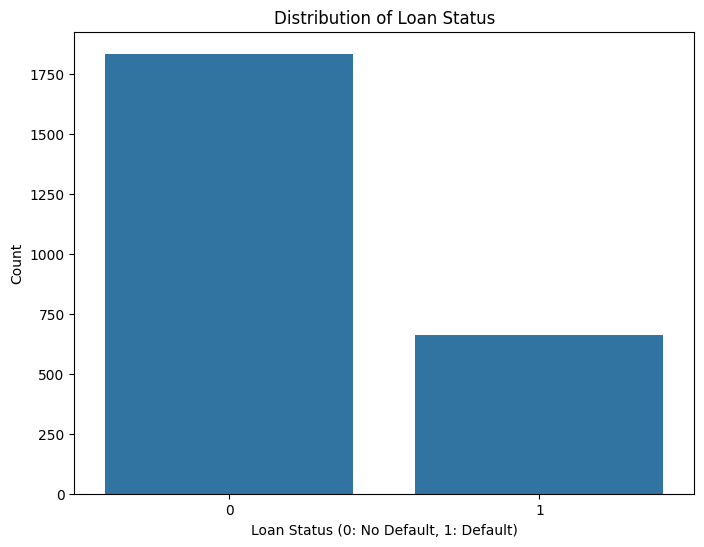

Total Loans: 2500
Default Count: 664
Default Rate: 26.56%


In [ ]:
# Plot the distribution of loan_status and calculate the exact default rate.

loan_status = df['loan_status']

plt.figure(figsize=(8, 6))
# histogram
sns.countplot(x=loan_status)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: No Default, 1: Default)')
plt.ylabel('Count')
plt.show()


# Calculate the exact default rate.
total_loans = len(loan_status)
default_count = loan_status.value_counts()[1]
default_rate = (default_count / total_loans) * 100
print(f"Total Loans: {total_loans}")
print(f"Default Count: {default_count}")
print(f"Default Rate: {default_rate:.2f}%")

/tmp/ipython-input-603495265.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/tmp/ipython-input-603495265.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/tmp/ipython-input-603495265.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
/tmp/ipython-input-603495265.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

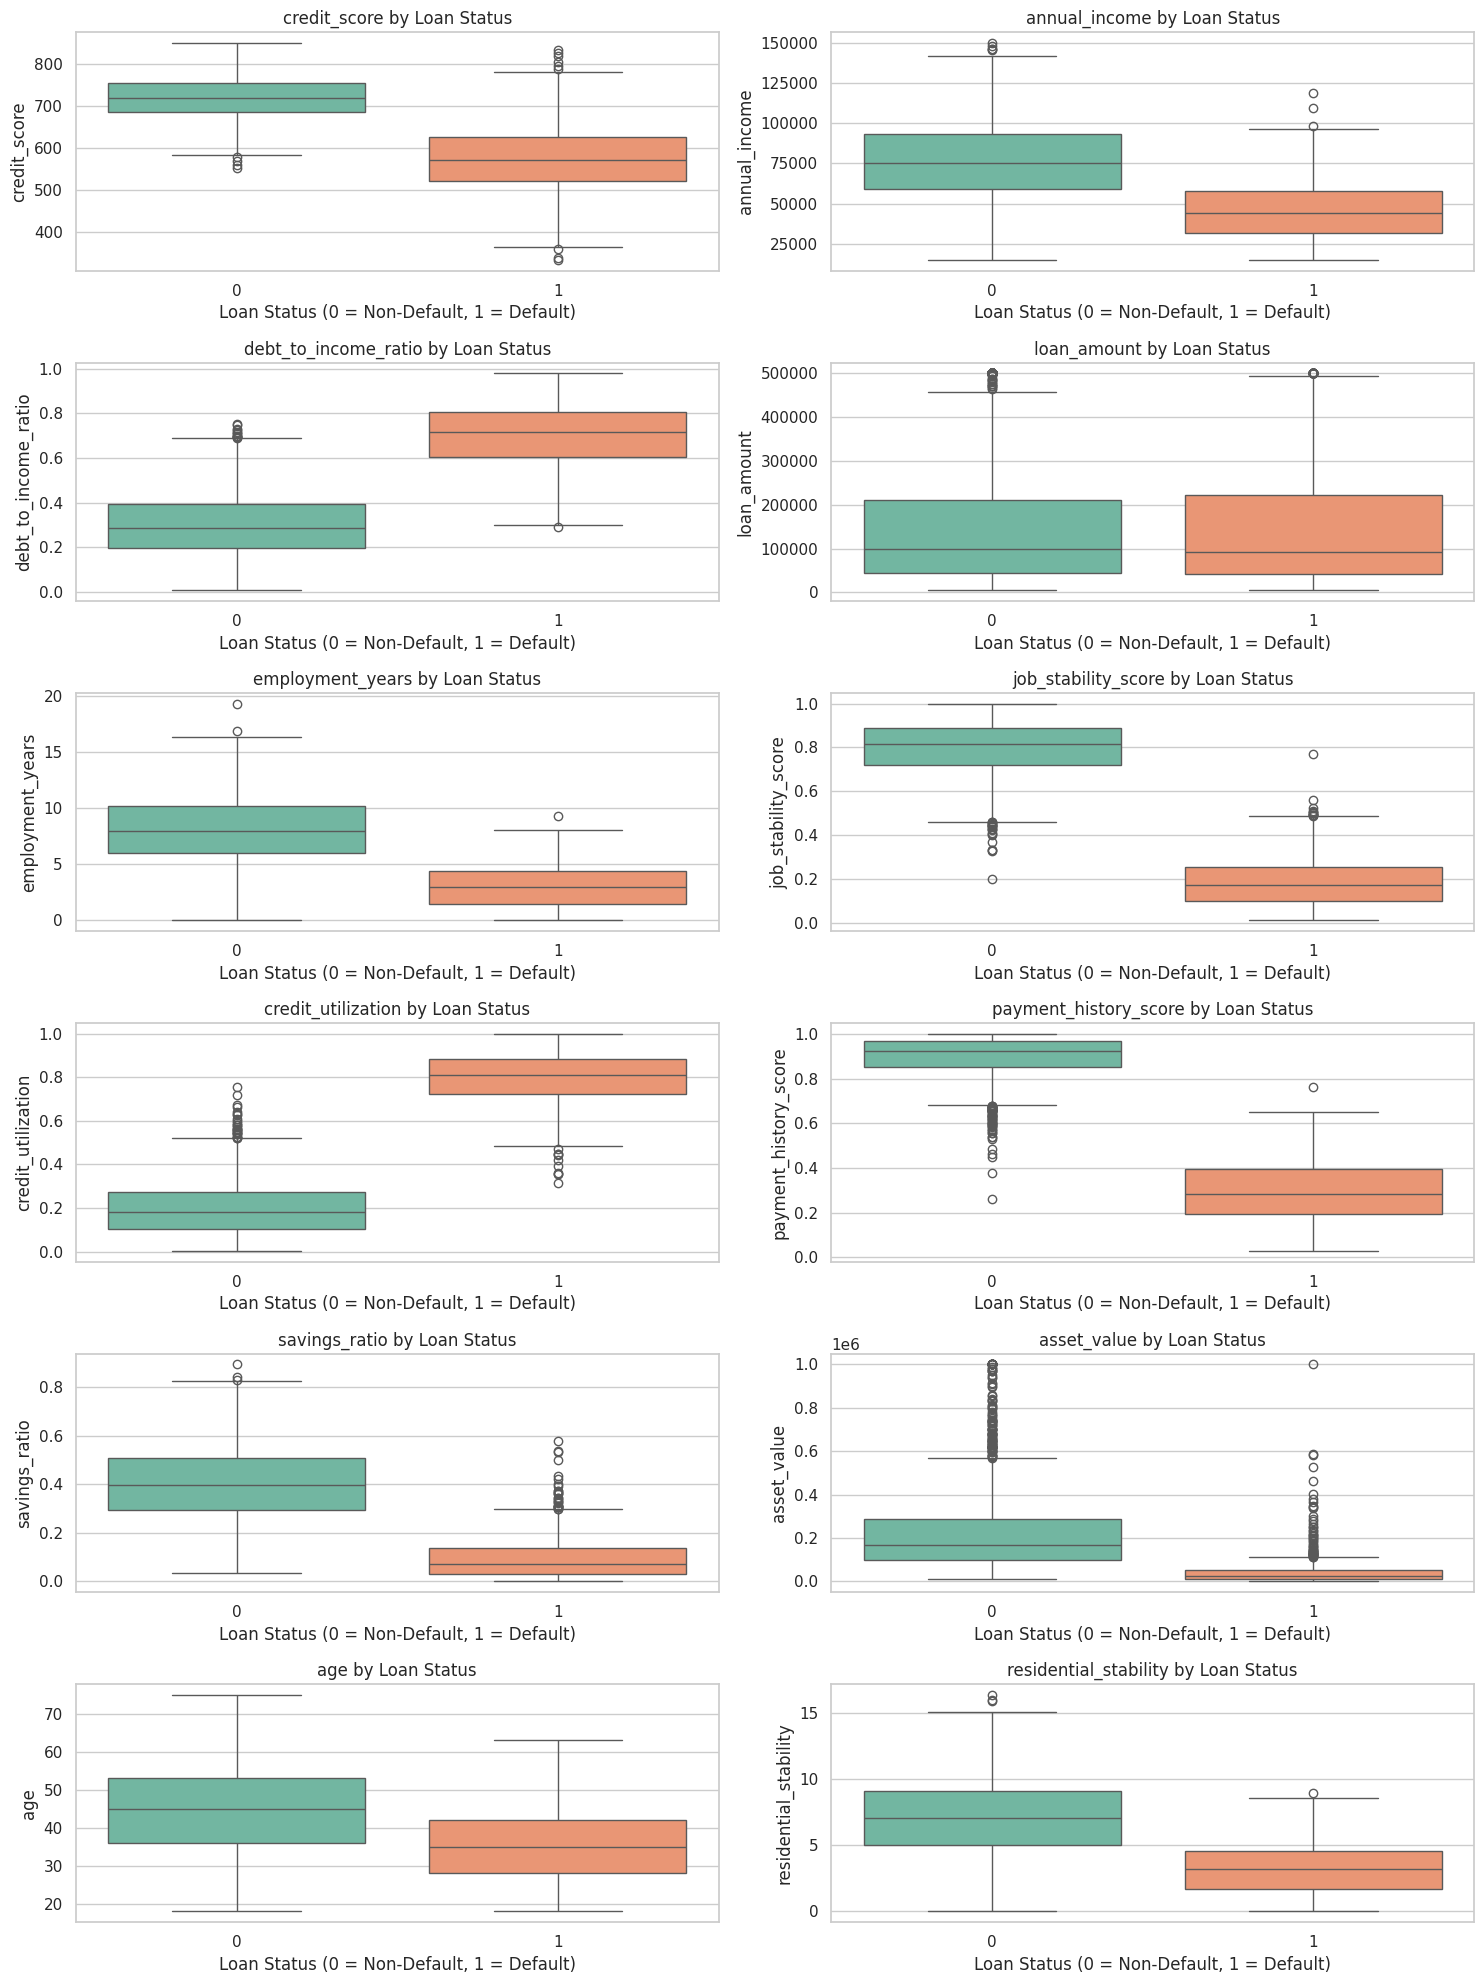

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous variables to visualize
continuous_vars = [
    'credit_score','annual_income','debt_to_income_ratio','loan_amount','employment_years',
    'job_stability_score','credit_utilization','payment_history_score',
    'savings_ratio','asset_value','age','residential_stability'
]

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(15, 20))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(data=df, x='loan_status', y=var, palette='Set2')
    plt.title(f'{var} by Loan Status')
    plt.xlabel('Loan Status (0 = Non-Default, 1 = Default)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()



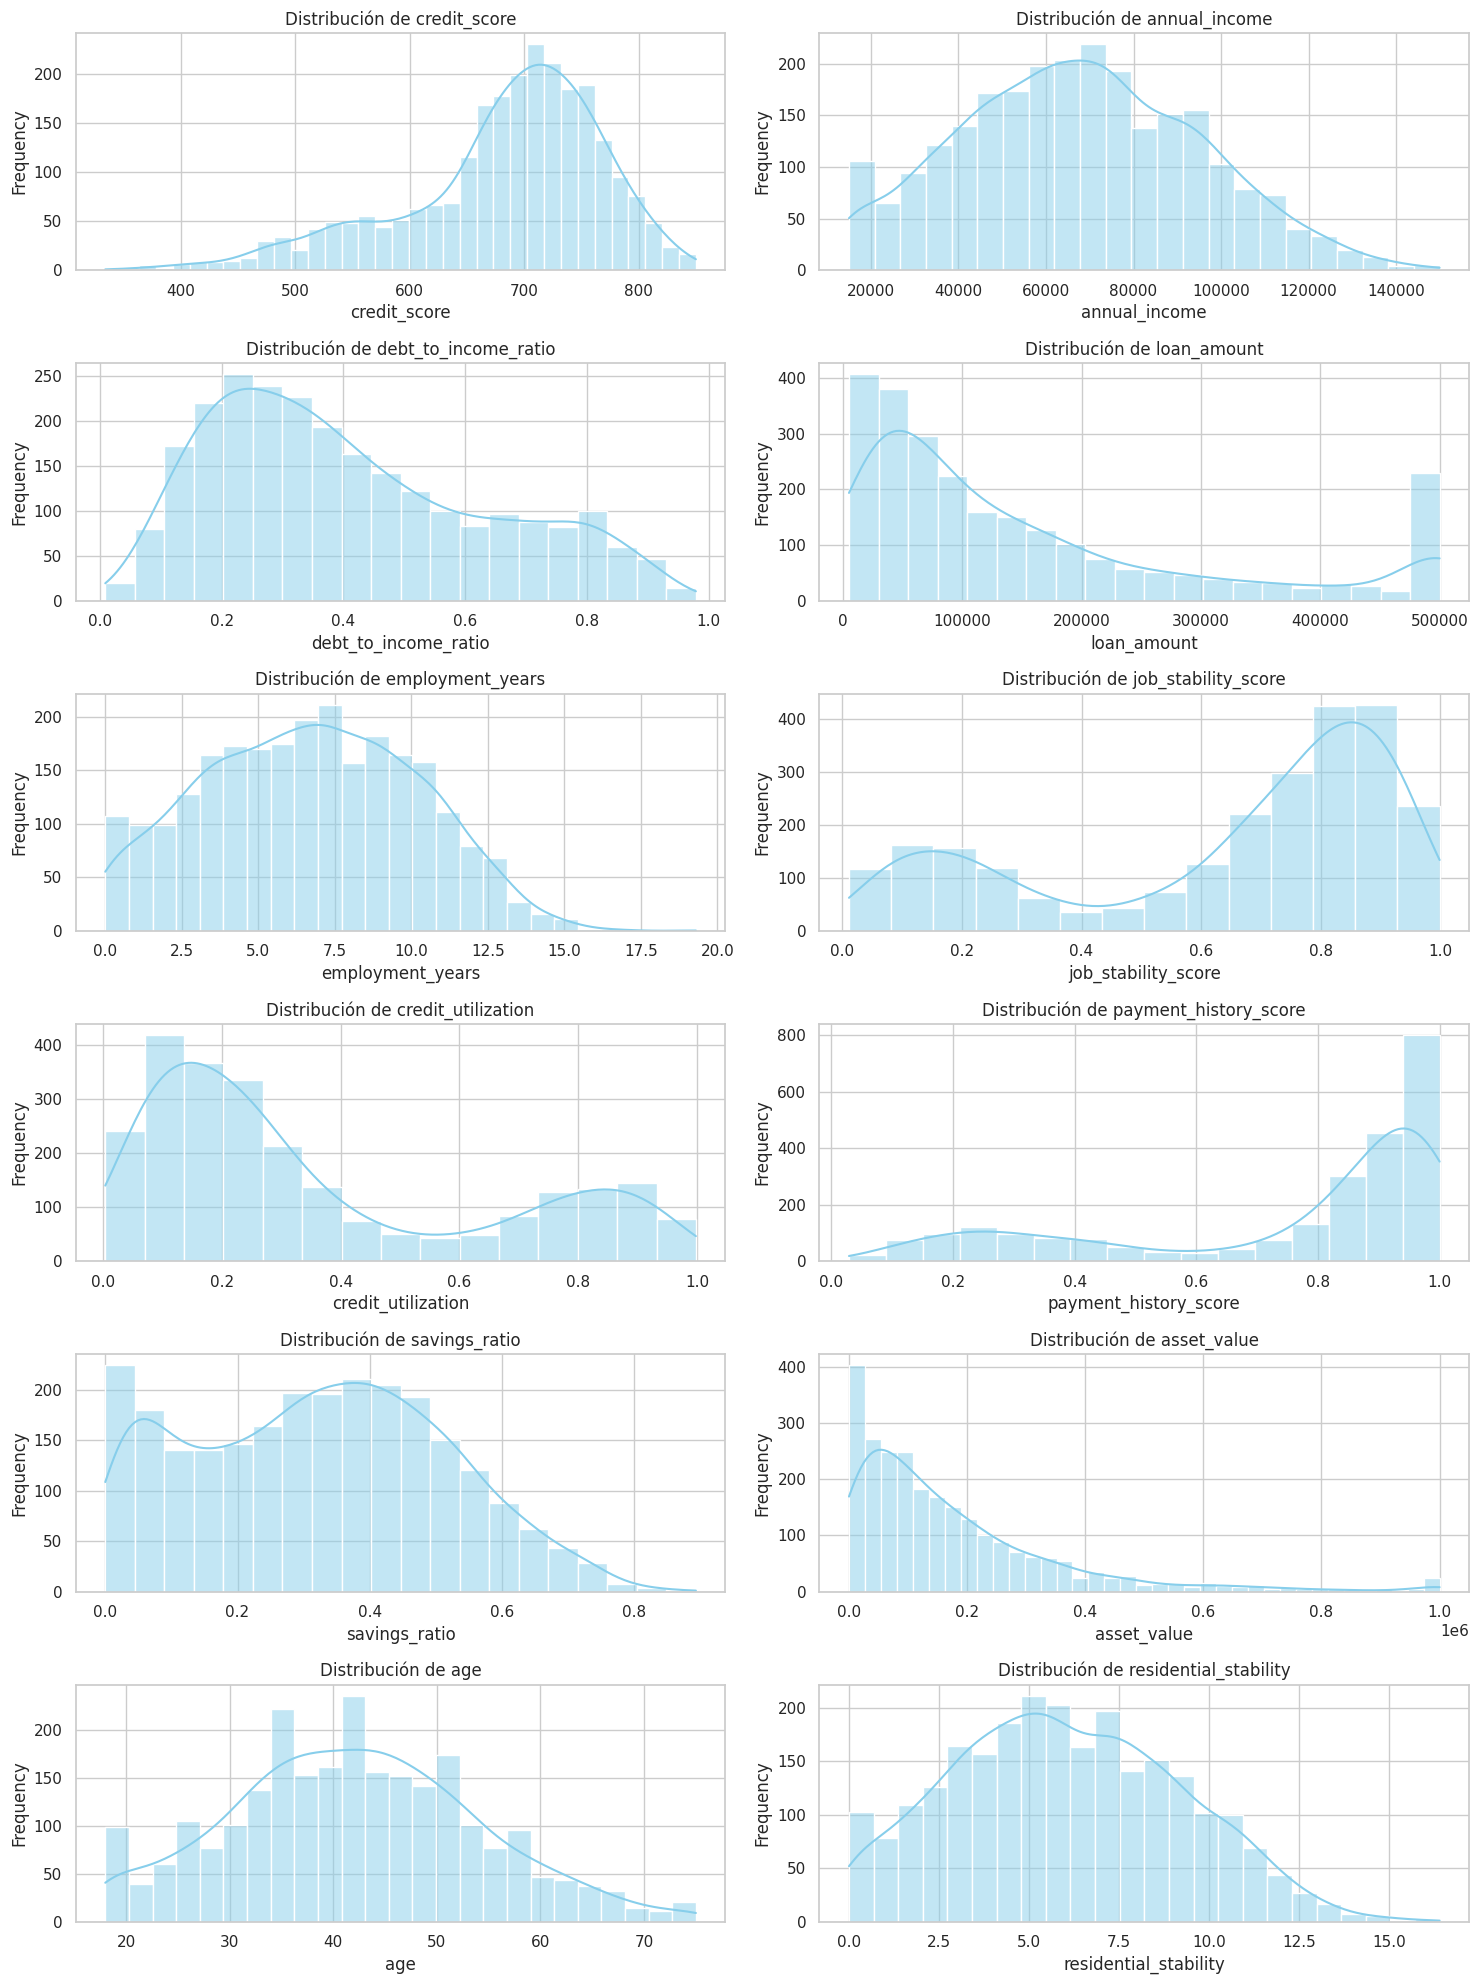

In [ ]:
# Gráficar continous variables com histograms

plt.figure(figsize=(15, 20))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(6, 2, i)
    sns.histplot(data=df, x=var, kde=True, color='skyblue')
    plt
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt
plt.tight_layout()
plt.show()

In [ ]:
df['education_level'].value_counts()

# groupby educational level for mean default rate
df.groupby('education_level')['loan_status'].mean()


,loan_status
education_level,
Associates,0.369128
Bachelors,0.154676
Doctorate,0.048913
High School,0.560811
Masters,0.128959


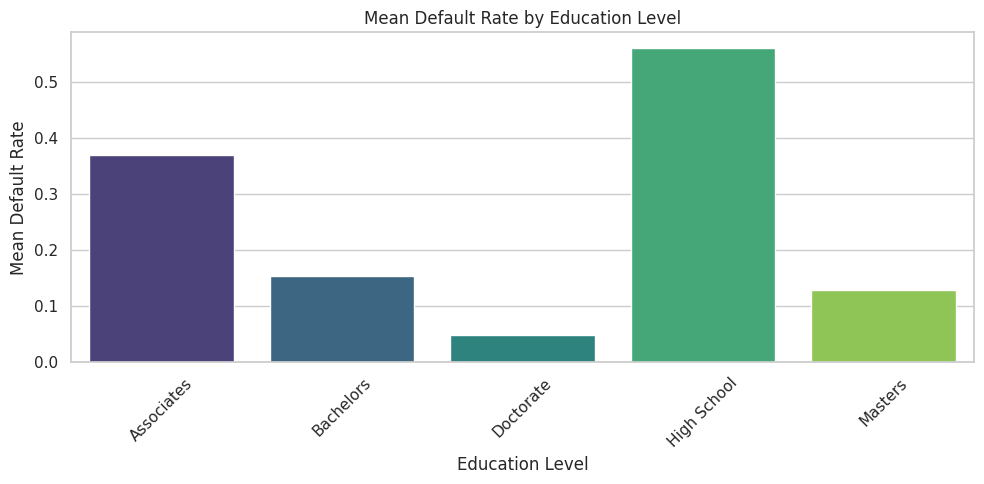

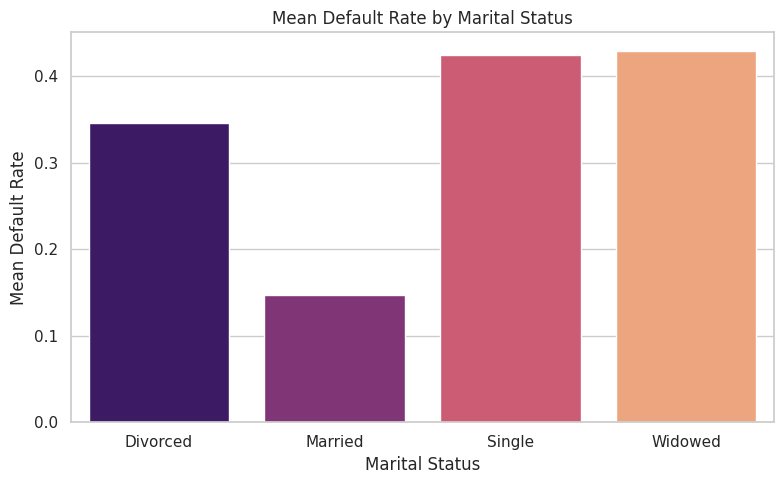

In [ ]:

# Set style
sns.set(style="whitegrid")

default_rates_educ = (
    df.groupby('education_level')['loan_status']
      .mean()
      .reset_index()
      .rename(columns={'loan_status': 'default_rate'})
)

default_rates_marital = (
    df.groupby('marital_status')['loan_status']
      .mean()
      .reset_index()
      .rename(columns={'loan_status': 'default_rate'})
)



plt.figure(figsize=(10, 5))
sns.barplot(data=default_rates_educ, x='education_level', y='default_rate', hue='education_level', legend=False, palette='viridis')
plt.title('Mean Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Default Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(data=default_rates_marital, x='marital_status', y='default_rate', hue='marital_status', legend=False, palette='magma')
plt.title('Mean Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Default Rate')
plt.tight_layout()
plt.show()

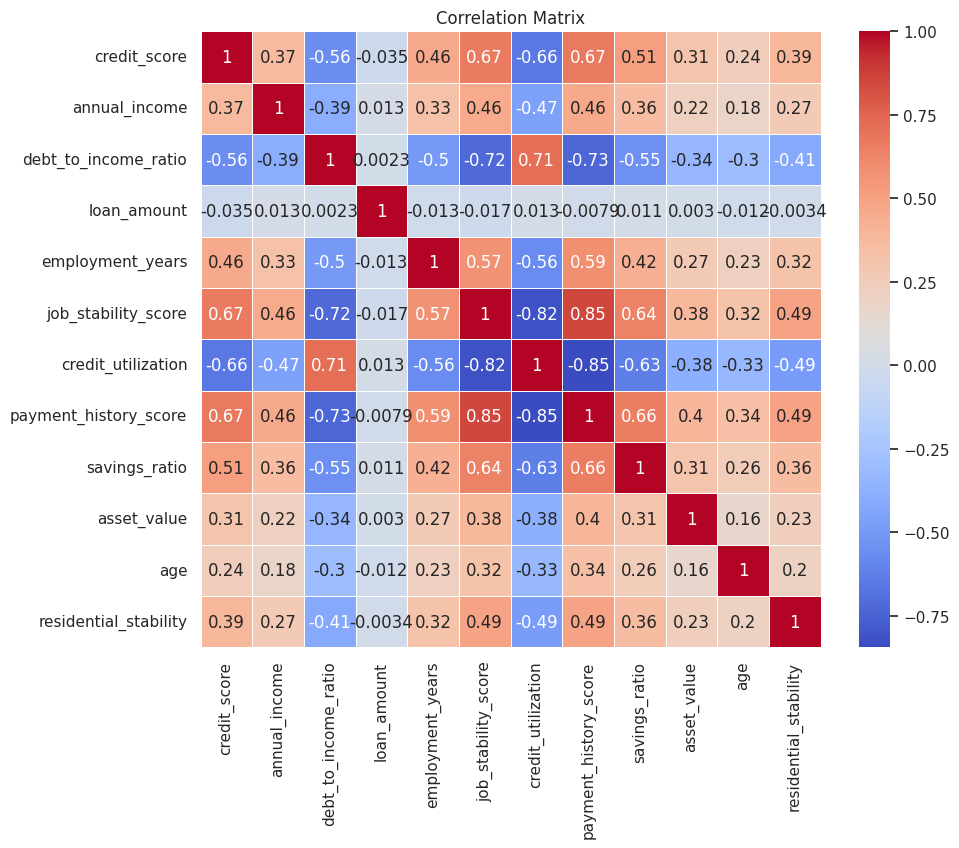

In [ ]:
# Correltaion for continuous_vars

correlation_matrix = df[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix.describe()

,credit_score,annual_income,debt_to_income_ratio,loan_amount,employment_years,job_stability_score,credit_utilization,payment_history_score,savings_ratio,asset_value,age,residential_stability
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.280763,0.233603,-0.232651,0.079472,0.258679,0.319335,-0.287300,0.323260,0.279506,0.214222,0.190159,0.237749
std,0.487464,0.389996,0.548401,0.290230,0.443269,0.568965,0.584199,0.578606,0.472911,0.358205,0.338189,0.400431
min,-0.657600,-0.467363,-0.732091,-0.034981,-0.563996,-0.817940,-0.845028,-0.845028,-0.626975,-0.380645,-0.328598,-0.486246
25%,0.171627,0.138400,-0.551312,-0.012127,0.165648,0.237627,-0.634631,0.251532,0.195030,0.121195,0.117523,0.150872
50%,0.379584,0.298325,-0.403739,-0.000569,0.324901,0.475626,-0.476804,0.478424,0.358970,0.249944,0.213832,0.293684
75%,0.550242,0.390495,-0.227114,0.011519,0.488187,0.643857,-0.243293,0.663408,0.542854,0.329894,0.272843,0.416695
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Variable con alta multiconilnealidad siendo 0.7


Credit utilization y job stability score - 0.82

job stability score y debt to income ratio - 0.72

Credit utilization y  payment history score - 0.85

debt to income ratio y Credit utilization - 0.71

payment history score y job stability score - 0.85

debt to income ratio y payment history score - 0.73

Sin embargo para elegir las varibles se usara RFE para tomar las variables con baja multicolinealidad.

# Section 3

In [ ]:
df.education_level.unique()


array(['High School', 'Masters', 'Bachelors', 'Associates', 'Doctorate'],
      dtype=object)

In [ ]:
df.marital_status.unique()

array(['Married', 'Divorced', 'Widowed', 'Single'], dtype=object)

In [ ]:
educationMAP = {'High School':1, 'Masters':4, 'Bachelors':3, 'Associates':2, 'Doctorate':5}
df['education_level'] = df['education_level'].map(educationMAP)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   int64  
 15  mari

In [ ]:
df_encoded = pd.get_dummies(df, columns=['marital_status'],dtype = float)

df_encoded = df_encoded[['application_id', 'application_date', 'loan_amount', 'annual_income',
       'employment_years', 'job_stability_score', 'credit_score',
       'credit_utilization', 'payment_history_score', 'open_credit_lines',
       'debt_to_income_ratio', 'savings_ratio', 'asset_value', 'age',
       'education_level', 'residential_stability',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed',"loan_status"]]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   application_id           2500 non-null   object 
 1   application_date         2500 non-null   object 
 2   loan_amount              2500 non-null   float64
 3   annual_income            2500 non-null   float64
 4   employment_years         2500 non-null   float64
 5   job_stability_score      2500 non-null   float64
 6   credit_score             2500 non-null   int64  
 7   credit_utilization       2500 non-null   float64
 8   payment_history_score    2500 non-null   float64
 9   open_credit_lines        2500 non-null   int64  
 10  debt_to_income_ratio     2500 non-null   float64
 11  savings_ratio            2500 non-null   float64
 12  asset_value              2500 non-null   float64
 13  age                      2500 non-null   int64  
 14  education_level         

In [ ]:
X = df_encoded.iloc[:,3:20]

X.info()
y = df_encoded.iloc[:,-1]
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_income            2500 non-null   float64
 1   employment_years         2500 non-null   float64
 2   job_stability_score      2500 non-null   float64
 3   credit_score             2500 non-null   int64  
 4   credit_utilization       2500 non-null   float64
 5   payment_history_score    2500 non-null   float64
 6   open_credit_lines        2500 non-null   int64  
 7   debt_to_income_ratio     2500 non-null   float64
 8   savings_ratio            2500 non-null   float64
 9   asset_value              2500 non-null   float64
 10  age                      2500 non-null   int64  
 11  education_level          2500 non-null   int64  
 12  residential_stability    2500 non-null   float64
 13  marital_status_Divorced  2500 non-null   float64
 14  marital_status_Married  

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
2495,0
2496,1
2497,0
2498,1


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # 20% para prueba
    random_state=42,       # Semilla para reproducibilidad
    stratify=y             # Opcional: mantiene proporciones de clases (útil en clasificación)
)


In [ ]:
X.columns

Index(['annual_income', 'employment_years', 'job_stability_score',
       'credit_score', 'credit_utilization', 'payment_history_score',
       'open_credit_lines', 'debt_to_income_ratio', 'savings_ratio',
       'asset_value', 'age', 'education_level', 'residential_stability',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed'],
      dtype='object')

In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
columnas_a_escalar =['annual_income', 'employment_years',
        'credit_score',
        'open_credit_lines', 'debt_to_income_ratio',
       'savings_ratio', 'asset_value', 'age', 'education_level',"residential_stability"]



X_scaled_train = pd.DataFrame(
    scaler.fit_transform(X_train[columnas_a_escalar]),
    columns=columnas_a_escalar,
    index=X_train.index
)


In [ ]:
X_train

,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed
2082,62648.24,9.9,0.541,714,0.171,0.815,3,0.240,0.549,168748.10,39,2,3.1,0.0,1.0,0.0,0.0
1319,113346.13,8.5,0.929,719,0.219,0.938,4,0.303,0.516,272892.03,59,4,5.5,0.0,1.0,0.0,0.0
1569,57588.47,13.6,0.769,742,0.244,0.815,1,0.659,0.550,82093.48,41,3,3.8,0.0,1.0,0.0,0.0
1257,83159.53,12.1,0.799,779,0.046,0.732,4,0.646,0.402,74527.88,71,2,5.8,0.0,0.0,0.0,1.0
2096,64288.01,6.0,0.519,722,0.148,0.949,2,0.233,0.394,122808.69,52,5,7.2,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,45946.99,6.1,0.829,626,0.085,0.932,5,0.332,0.370,143994.83,26,1,7.4,1.0,0.0,0.0,0.0
1334,86267.61,9.0,0.830,706,0.063,0.994,3,0.462,0.392,218923.92,68,4,8.1,0.0,0.0,1.0,0.0
626,34526.29,4.5,0.181,545,0.922,0.261,2,0.786,0.246,25799.60,45,3,2.9,1.0,0.0,0.0,0.0
1901,61908.46,5.0,0.818,643,0.222,0.905,4,0.234,0.262,67014.03,52,4,7.7,0.0,1.0,0.0,0.0


In [ ]:
X_scaled_train.columns = columnas_a_escalar
X_scaled_train

,annual_income,employment_years,credit_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability
2082,0.353133,0.585799,0.736434,0.272727,0.229406,0.614782,0.168290,0.368421,0.25,0.189024
1319,0.728868,0.502959,0.746124,0.363636,0.295099,0.577828,0.272491,0.719298,0.75,0.335366
1569,0.315634,0.804734,0.790698,0.090909,0.666319,0.615901,0.081588,0.403509,0.50,0.231707
1257,0.505147,0.715976,0.862403,0.363636,0.652763,0.450168,0.074018,0.929825,0.25,0.353659
2096,0.365286,0.355030,0.751938,0.181818,0.222106,0.441209,0.122325,0.596491,1.00,0.439024
...,...,...,...,...,...,...,...,...,...,...
1165,0.229356,0.360947,0.565891,0.454545,0.325339,0.414334,0.143523,0.140351,0.00,0.451220
1334,0.528182,0.532544,0.720930,0.272727,0.460897,0.438970,0.218494,0.877193,0.75,0.493902
626,0.144714,0.266272,0.408915,0.181818,0.798749,0.275476,0.025263,0.473684,0.50,0.176829
1901,0.347650,0.295858,0.598837,0.363636,0.223149,0.293393,0.066500,0.596491,0.75,0.469512


In [ ]:
X_train = X_train.drop(columns = columnas_a_escalar)
X_train

,job_stability_score,credit_utilization,payment_history_score,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed
2082,0.541,0.171,0.815,0.0,1.0,0.0,0.0
1319,0.929,0.219,0.938,0.0,1.0,0.0,0.0
1569,0.769,0.244,0.815,0.0,1.0,0.0,0.0
1257,0.799,0.046,0.732,0.0,0.0,0.0,1.0
2096,0.519,0.148,0.949,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1165,0.829,0.085,0.932,1.0,0.0,0.0,0.0
1334,0.830,0.063,0.994,0.0,0.0,1.0,0.0
626,0.181,0.922,0.261,1.0,0.0,0.0,0.0
1901,0.818,0.222,0.905,0.0,1.0,0.0,0.0


In [ ]:
#X_scaled_train = X_scaled_train.reset_index(drop=True)
#X_train = X_train.reset_index(drop=True)

X_train = pd.concat([X_scaled_train, X_train], axis=1)
X_train



,annual_income,employment_years,credit_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,residential_stability,job_stability_score,credit_utilization,payment_history_score,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed
2082,0.353133,0.585799,0.736434,0.272727,0.229406,0.614782,0.168290,0.368421,0.25,0.189024,0.541,0.171,0.815,0.0,1.0,0.0,0.0
1319,0.728868,0.502959,0.746124,0.363636,0.295099,0.577828,0.272491,0.719298,0.75,0.335366,0.929,0.219,0.938,0.0,1.0,0.0,0.0
1569,0.315634,0.804734,0.790698,0.090909,0.666319,0.615901,0.081588,0.403509,0.50,0.231707,0.769,0.244,0.815,0.0,1.0,0.0,0.0
1257,0.505147,0.715976,0.862403,0.363636,0.652763,0.450168,0.074018,0.929825,0.25,0.353659,0.799,0.046,0.732,0.0,0.0,0.0,1.0
2096,0.365286,0.355030,0.751938,0.181818,0.222106,0.441209,0.122325,0.596491,1.00,0.439024,0.519,0.148,0.949,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,0.229356,0.360947,0.565891,0.454545,0.325339,0.414334,0.143523,0.140351,0.00,0.451220,0.829,0.085,0.932,1.0,0.0,0.0,0.0
1334,0.528182,0.532544,0.720930,0.272727,0.460897,0.438970,0.218494,0.877193,0.75,0.493902,0.830,0.063,0.994,0.0,0.0,1.0,0.0
626,0.144714,0.266272,0.408915,0.181818,0.798749,0.275476,0.025263,0.473684,0.50,0.176829,0.181,0.922,0.261,1.0,0.0,0.0,0.0
1901,0.347650,0.295858,0.598837,0.363636,0.223149,0.293393,0.066500,0.596491,0.75,0.469512,0.818,0.222,0.905,0.0,1.0,0.0,0.0


# Section 4
 key statistical assumptions that differentiate LDA and QDA


Antes de aplicar los modelos, se debe determinar las diferencias estádisticas de LDA y QDA.

LDA es un modelo de clasificación que se basa en identificar grupos al considerar que todas las variables tienen una convarianza lineal. Esto quiere decir que se asume que todas las variables provienen de una distribución Gaussiana. Por otra parte, QDA asume que las covarianzas son cuadraticas.

Multivariate Normality: observando los histogramas hechos anteriormente, se puede observar como es que las varibles no tienen una distribución Gaussiana en su mayoría.

Homogeneity of Covariance Matrices: utilizando las gráficas anteriores se observa como es que no hay una homogeniedad en las matrices de covarianza, ya que la distribución de cada variable es diferente.

Por lo tanto, se plantea la siguiente hipótesis: Si las matrices de covarancia son diferentes, entonces, se espera que el modelo QDA tenga mejores resultados que LDA.

# Section 5 - Linear Discriminant Analysis (LDA)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np


# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Extract coeficientes
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lda.coef_[0],
    'Abs_Coefficient': np.abs(lda.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

coefficients


,Feature,Coefficient,Abs_Coefficient
12,payment_history_score,-53.807819,53.807819
10,job_stability_score,-44.244810,44.244810
11,credit_utilization,40.412427,40.412427
2,credit_score,-22.301436,22.301436
4,debt_to_income_ratio,19.025892,19.025892
5,savings_ratio,-14.100416,14.100416
1,employment_years,-11.452017,11.452017
9,residential_stability,-8.690222,8.690222
0,annual_income,-7.820056,7.820056
6,asset_value,-6.702356,6.702356


In [ ]:
lda.classes_

array([0, 1])

In [ ]:
lda_scores = lda.transform(X_train)

lda_scores_df = pd.DataFrame(
    lda_scores,
    columns=[f"LD{i + 1}" for i in range(lda_scores.shape[1])],
)

lda_scores_df

,LD1
0,-1.471836
1,-4.005368
2,-1.634797
3,-2.193926
4,-2.033383
...,...
1995,-2.590404
1996,-3.692438
1997,8.446930
1998,-2.271978


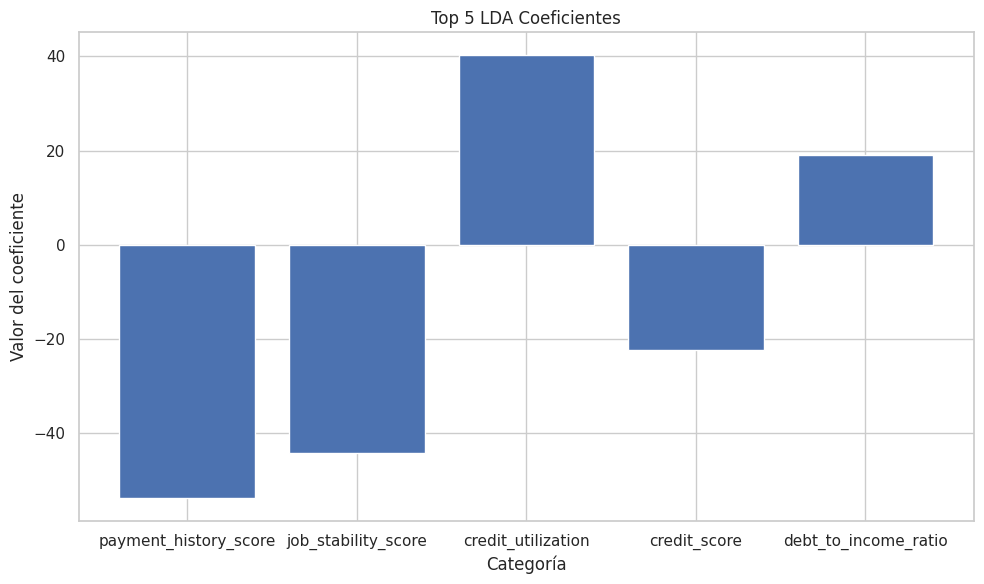

In [ ]:
# Show a simple bar chart of your top 3-5 LDA coefficients.
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Feature'].head(5), coefficients['Coefficient'].head(5))
plt.xlabel('Categoría')
plt.ylabel('Valor del coeficiente')
plt.title('Top 5 LDA Coeficientes')
plt.tight_layout()

Observando los resultados anteriores, se puede identificar que las variables más importantes para predecir el riesgo deafult son:


*   payment_history_score: -53.886626
*   job_stability_score: -44.344218
*   credit_utilization: 40.498805
*   credit_score: -22.401797
*   debt_to_income_ratio: 19.031001

Asismismo, se encontró que cuando el valor del coeficiente es positivo, es significa que cuando la variables incrementa, entonces el riesgo de ser default también. Por el contrario, si este es negativo, se tiene menos riesgo.

Por lo tanto, las variables que al crecer hacen que haya menos riesgo de tener un estado default, son payment_history_score, job_stability_score y credit_score. Por su parte, las variables que hacen que haya más riesgo son credit_utilization y debt_to_income_ratio.


Esto sugiere que al tener un mejor historial crediticio, tener un empleo estabile y un buen score crediticio, la persona tendrá menos riesgo a tener deudas de prestamos. Mientras que si hay un mal uso del credito, esto es si se gasta más de lo que se tiene en el crédito y si se tiene una alta deuda sobre lo que genera, entonces, es hay un riesgo más alto de ser default.

A continuación se realizara el modelo QDA para evaluar si la hipótesis de acepta o se rechaza.


# Section 6: Model 2 - Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


QuadraticDiscriminantAnalysis()

QDA no produce coeficientes lineales simples, por lo que no es posible realizar una interpetación en este caso.

A continuación se hara una comparación entre ambos modelos, para encontrar el mejor en este caso.

# Section 7: Model Evaluation & Comparison

In [ ]:
# Se debe de escalar X_test para que quede en las mismas dimensiones
X_train_fixed = X_train.copy()
X_train_fixed[columnas_a_escalar] = X_scaled_train


# Escalar columnas númericas
X_test_scaled_part = pd.DataFrame(
    scaler.transform(X_test[columnas_a_escalar]),
    columns=columnas_a_escalar,
    index=X_test.index
)

# Mantener el resto de las columnas igual
other_cols = [c for c in X_train_fixed.columns if c not in columnas_a_escalar]


# Juntar ambas partes, la escalada y el resto
X_test_pred = pd.concat([X_test_scaled_part, X_test[other_cols]], axis=1)

# Reordenar columnas como en X_train

feature_order = X_train_fixed.columns

X_test_pred = X_test_pred[feature_order]



Tiempo de predicción LDA: 0.002320 segundos
Tiempo de predicción QDA: 0.002247 segundos


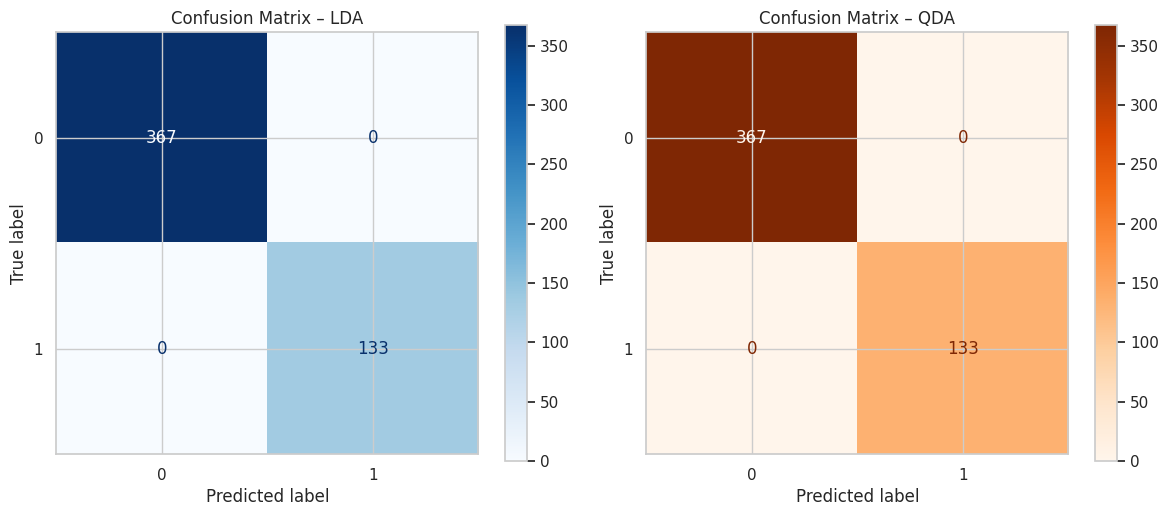

=== Classification Report: LDA ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


=== Classification Report: QDA ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



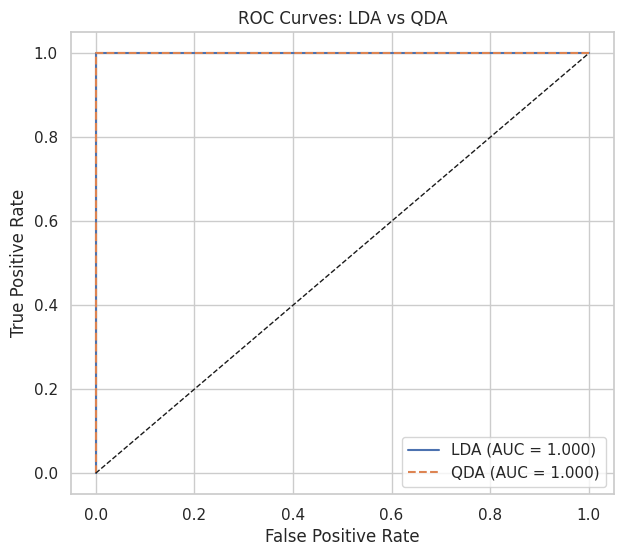

AUC (LDA): 1.000
AUC (QDA): 1.000


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import time


# Predicciones
start_lda = time.time()
y_pred_lda = lda.predict(X_test_pred)
end_lda = time.time()

start_qda = time.time()
y_pred_qda = qda.predict(X_test_pred)
end_qda = time.time()

# Tiempo de ejecución
lda_time = end_lda - start_lda
qda_time = end_qda - start_qda

print(f"Tiempo de predicción LDA: {lda_time:.6f} segundos")
print(f"Tiempo de predicción QDA: {qda_time:.6f} segundos")


# Generar matrices de correlación
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lda, ax=ax[0], cmap="Blues")
ax[0].set_title("Confusion Matrix – LDA")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_qda, ax=ax[1], cmap="Oranges")
ax[1].set_title("Confusion Matrix – QDA")
plt.tight_layout(); plt.show()


# Reporte de Clasificación
print("=== Classification Report: LDA ===")
print(classification_report(y_test, y_pred_lda))


print("\n=== Classification Report: QDA ===")
print(classification_report(y_test, y_pred_qda))

# Generate the RocCurveDisplay
y_prob_lda = lda.predict_proba(X_test_pred)[:, 1]
y_prob_qda = qda.predict_proba(X_test_pred)[:, 1]

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
auc_lda = roc_auc_score(y_test, y_prob_lda)
auc_qda = roc_auc_score(y_test, y_prob_qda)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.3f})")
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.3f})", linestyle="--")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves: LDA vs QDA"); plt.legend(); plt.grid(True); plt.show()

print(f"AUC (LDA): {auc_lda:.3f}")
print(f"AUC (QDA): {auc_qda:.3f}")



# Section 8: Technical Conclusion & Model Selection
Observando, los resultados, se observa que ambos modelos logran clasificar el estatus de deuda al 100%, en todas las métricas. Asimismo, se midió el tiempo de ejecución de ambos modelos para observar cuál es más rápido. En este caso, se puede observar que el modelo que tarda menos es el de QDA, aunque la diferencia de tiempo es pequeña, por lo que no se puede concluir que el modelo es significativamente más rápido.

Por lo tanto, se rechaza la hipótesis, ya que a pesar de tener una matriz de covarianza diferente, el modelo LDA se comportó de la misma manera que el QDA. Por lo tanto, la elección de un modelo es indiferente; ambos resultados dan lo mismo. Sin embargo, en caso de que la empresa busque eficiencia, el mejor modelo es QDA, aunque el tiempo de diferencia es relativamente el mismo.


Es importante mencionar que en este caso lo que se quiere reducir el número de falsos negativos, ya que se busca evitar que los clientes con deudas, sean seleccionados como personas sin deudas. De igual manera, se busca reducir el número de falsos positivos, ya que esto haría que la empresa no seleccionara a clientes sin deuda. Lo que sería un resultado no deseado, ya que la empresa busca reducir la probabilidad de que las personas tengan una deuda default. Por lo tanto, la métrica que tiene más importancia en este caso es F1-score, ya que se busca tener un balance harmónico entre la precisión y sensibilidad.

Por ende, en este caso, es de mayor importancia observar el f1_score, aunque como se mencionó anteirormente, en este caso ambos modelos lograron un resultado del 100%.


















































































.
.
.
